# Data Description:
    
In this project,we have to make carprice valuation model using new machine learning models from new data.Because with the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models.

In [1]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Carprices.xlsx")
df.head()

,Unnamed: 0,location_list,model_list,year,Km,Price,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,"VILE PARLE EAST, MUMBAI","BMW 7 Series 730Ld Sedan, 2018, Diesel",2018,25115.0,7500000,NaN,NaN,NaN
1,NaN,"THANE WEST, THANE","BMW 3 Series 320d Sedan, 2010, Diesel",2010,120000.0,545000,NaN,NaN,NaN
2,NaN,"TATABAD COLONY, COIMBATORE","BMW 7 Series 730Ld Sedan, 2010, Diesel",2010,61460.0,1890000,NaN,NaN,NaN
3,NaN,"KASBA INDUSTRIAL ESTATE, KOLKATA","BMW 5 Series 525d Sedan, 2011, Diesel",2011,52000.0,975000,NaN,NaN,NaN
4,NaN,"SHAKTI NAGAR, AMBALA","BMW 3 Series 320i Sedan, 2012, Diesel",2012,90000.0,980000,NaN,NaN,NaN


In [3]:
df.shape

(4400, 9)

# Droping Unnecessary columns

In [4]:
df.drop(['Unnamed: 0','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis =1, inplace = True)

In [5]:
df.shape

(4400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_list  4400 non-null   object 
 1   model_list     4400 non-null   object 
 2   year           4400 non-null   int64  
 3   Km             4300 non-null   float64
 4   Price          4400 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 172.0+ KB


In [7]:
df.dtypes

location_list     object
model_list        object
year               int64
Km               float64
Price              int64
dtype: object

In [8]:
df.columns

Index(['location_list', 'model_list', 'year', 'Km', 'Price'], dtype='object')

In [9]:
df.isnull().sum()

location_list      0
model_list         0
year               0
Km               100
Price              0
dtype: int64

<AxesSubplot:>

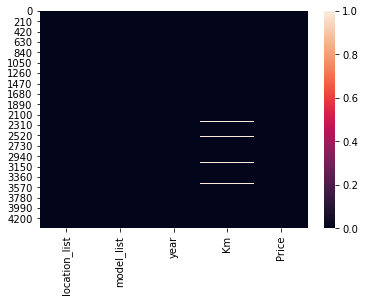

In [10]:
sns.heatmap(df.isnull())

# Filling Null Values

In [11]:
df = df.interpolate()

In [12]:
df.isnull().sum()

location_list    0
model_list       0
year             0
Km               0
Price            0
dtype: int64

<AxesSubplot:>

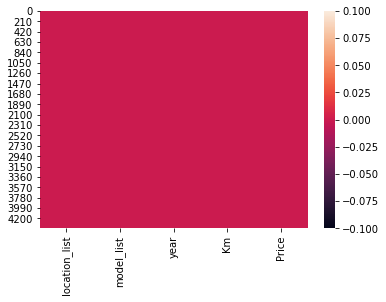

In [13]:
sns.heatmap(df.isnull())

<AxesSubplot:>

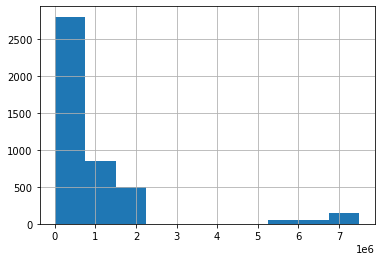

In [14]:
df["Price"].hist(grid=True)

# Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["location_list","model_list"]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [16]:
df.head()

,location_list,model_list,year,Km,Price
0,89,22,2018,25115.0,7500000
1,79,5,2010,120000.0,545000
2,78,21,2010,61460.0,1890000
3,40,16,2011,52000.0,975000
4,73,9,2012,90000.0,980000


# Statistical Analysis

In [17]:
df.describe()

,location_list,model_list,year,Km,Price
count,4400.000000,4400.000000,4400.000000,4400.000000,4.400000e+03
mean,45.949091,41.852273,2013.636364,66820.005682,9.774875e+05
std,26.679318,24.985351,3.718260,38697.293681,1.530676e+06
min,0.000000,0.000000,2003.000000,11000.000000,2.001000e+03
25%,23.000000,20.750000,2011.000000,31312.375000,2.437500e+05
50%,46.000000,41.500000,2014.000000,63500.000000,4.950000e+05
75%,69.000000,63.250000,2018.000000,90250.000000,9.762500e+05
max,91.000000,85.000000,2021.000000,178000.000000,7.500000e+06


In [18]:
df.corr()

,location_list,model_list,year,Km,Price
location_list,1.000000,-0.004801,0.071624,-0.029684,0.109300
model_list,-0.004801,1.000000,0.188936,0.237914,0.001375
year,0.071624,0.188936,1.000000,-0.420481,-0.063380
Km,-0.029684,0.237914,-0.420481,1.000000,-0.128996
Price,0.109300,0.001375,-0.063380,-0.128996,1.000000


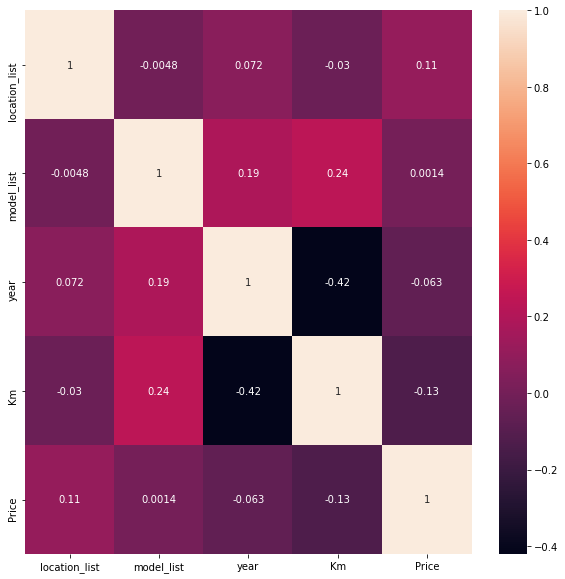

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the correlation matrix,we can see that less columns are positively correlated with the target variable 'Price'.We can see that the independent variables are highly correlated with each other,for example,'Model(used car)' is highly correlated with 'Location'.

# Visualization

array([[<AxesSubplot:title={'center':'location_list'}>,
        <AxesSubplot:title={'center':'model_list'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Km'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

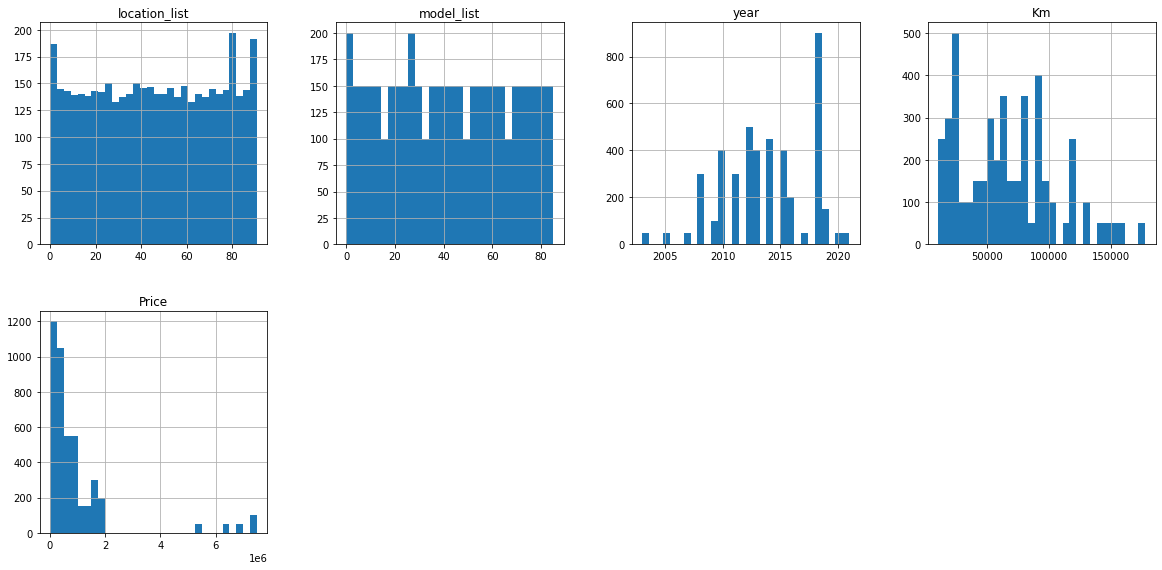

In [20]:
#Plotting histogram
#A histogram shows the frequency on the vertical axis and the horizontal axis in another dimension. 
# In this graph, we can also check whether the graph is right skewed, left skewed or the graph is normally distributed graph
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

<AxesSubplot:ylabel='Price'>

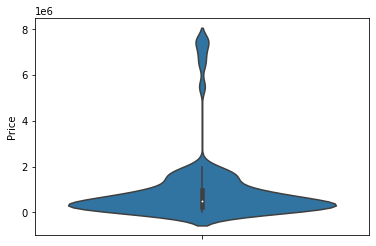

In [21]:
sns.violinplot(y="Price",data=df)

Here most price are lying in between 0 to 3

<AxesSubplot:xlabel='location_list', ylabel='year'>

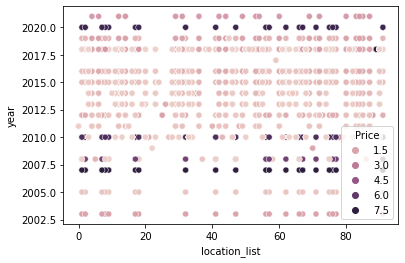

In [22]:
sns.scatterplot(x="location_list",y="year",data=df,hue="Price")

Text(0.5, 1.0, 'year vs model_list')

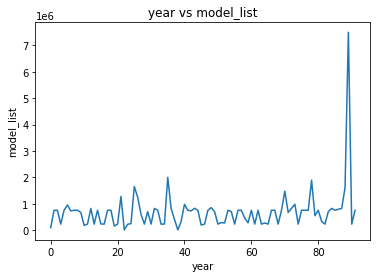

In [23]:
df.groupby('location_list')['Price'].median().plot()
plt.xlabel('year')
plt.ylabel('model_list')
plt.title("year vs model_list")

# Checking Outliers

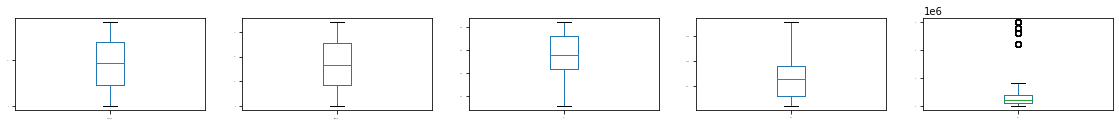

In [24]:
df.plot(kind="box",subplots=True,layout=(10,10),sharex=False,legend=False,fontsize=1,figsize=(40,20))
plt.show()

outliers are in price column

# Skewness

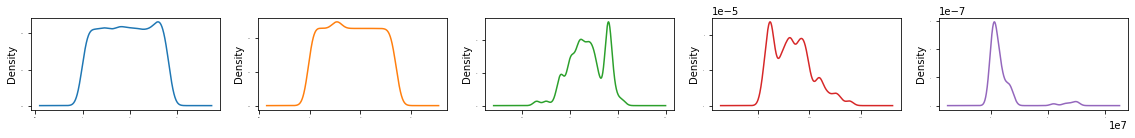

In [25]:
df.plot(kind="density",subplots=True,layout=(10,10),sharex=False,legend=False,fontsize=1,figsize=(40,20))
plt.show()

Right skewness is in price column

In [26]:
x=df.drop(["Price"],axis=1)
y=df["Price"]

# Data Cleansing

In [27]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing outliers using IQR Method
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [28]:
df_new.shape

(4150, 5)

In [29]:
df.shape

(4400, 5)

In [30]:
loss_percentage=(4400-4150)/4400*100
print(loss_percentage)

5.681818181818182


As we can see, we lost only 5% data here, it means outliers are remove and we use df_new data set for model building

In [31]:
df_new.skew()

location_list   -0.001512
model_list       0.015059
year            -0.326159
Km               0.533177
Price            0.969865
dtype: float64

In [32]:
from sklearn.preprocessing import power_transform
df1=power_transform(x)
df1=pd.DataFrame(df_new,columns=x.columns)

In [33]:
df1.skew()

location_list   -0.001512
model_list       0.015059
year            -0.326159
Km               0.533177
dtype: float64

# Finding The Best Random State

In [37]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
maxAucc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    le=LinearRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.07684807400038496 on random_state 84


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23,random_state=84)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_trains = ss.fit_transform(x_train)
x_tests = ss.transform(x_test)

In [39]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

lr=LinearRegression()
lr.fit(x_trains,y_train)
pred=lr.predict(x_tests)
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

2246696119174.845
880481.3333865008
Root mean squared error: 1498898.3018119826
0.06899543626773885


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_trains,y_train)
pred=rf.predict(x_tests)
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

1022090452.396651
2759.3418972332015
Root mean squared error: 31970.1493959076
0.9995764576848613


In [41]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_trains,y_train)
pred=ad.predict(x_tests)
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

138882906439.66418
308628.69632433075
Root mean squared error: 372669.9698656496
0.9424485498433954


In [42]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_trains,y_train)
pred=dtc.predict(x_tests)
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

0.0
0.0
Root mean squared error: 0.0
1.0


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_trains,y_train)
pred=gb.predict(x_tests)
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

31941698739.596436
135809.61966115734
Root mean squared error: 178722.4069320812
0.9867637340688302


# Hyper Parameter Tunning

In [47]:
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [48]:
parameters={"n_jobs":np.arange(2,20),
           "normalize":["bool"]},
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)
GCV.fit(x_trains,y_train)
GCV.fit(x_trains,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=({'n_jobs': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                          'normalize': ['bool']},))

In [49]:
GCV.best_params_

{'n_jobs': 2, 'normalize': 'bool'}

In [50]:
lr_mod=LinearRegression(n_jobs="2",normalize='bool')

lr_mod.fit(x_trains,y_train)
pred=lr_mod.predict(x_tests)
print(r2_score(y_test,pred)*100)

6.899543626773886


# Random Forest

In [52]:
parameters={"n_estimators":np.arange(2,20),
           "criterion":["mse","mae"]},
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(x_trains,y_train)
GCV.fit(x_trains,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=({'criterion': ['mse', 'mae'],
                          'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},))

In [53]:
GCV.best_params_

{'criterion': 'mae', 'n_estimators': 2}

In [54]:
rf_mod=RandomForestRegressor(criterion="mae",n_estimators=2)

rf_mod.fit(x_trains,y_train)
pred=rf_mod.predict(x_tests)
print(r2_score(y_test,pred)*100)

100.0


# Ada Boost Regressor

In [55]:
parameters={"n_estimators":np.arange(2,20),
           "loss":["linear","square","exponential"]},
GCV=GridSearchCV(AdaBoostRegressor(),parameters,cv=5)
GCV.fit(x_trains,y_train)
GCV.fit(x_trains,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid=({'loss': ['linear', 'square', 'exponential'],
                          'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},))

In [56]:
GCV.best_params_

{'loss': 'square', 'n_estimators': 18}

In [57]:
ad_mod=AdaBoostRegressor(loss="square",n_estimators=18)

ad_mod.fit(x_trains,y_train)
pred=ad_mod.predict(x_tests)
print(r2_score(y_test,pred)*100)

92.20891108133142


# Decision Tree Regressor

In [58]:
parameters={"max_depth":np.arange(2,20),
           "criterion":["mse","friedman_mse","mae","poisson"]},
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_trains,y_train)
GCV.fit(x_trains,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=({'criterion': ['mse', 'friedman_mse', 'mae',
                                        'poisson'],
                          'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},))

In [59]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 19}

In [60]:
dtc_mod=DecisionTreeRegressor(criterion="friedman_mse",max_depth=19)

dtc_mod.fit(x_trains,y_train)
pred=dtc_mod.predict(x_tests)
print(r2_score(y_test,pred)*100)

100.0


# Gradient Boosting Regressor

In [61]:
parameters={"n_estimators":np.arange(2,20),
           "loss":["ls","lad","huber","quantile"]},
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
GCV.fit(x_trains,y_train)
GCV.fit(x_trains,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=({'loss': ['ls', 'lad', 'huber', 'quantile'],
                          'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},))

In [62]:
GCV.best_params_

{'loss': 'ls', 'n_estimators': 19}

In [63]:
gb_mod=GradientBoostingRegressor(loss="ls",n_estimators=19)

gb_mod.fit(x_trains,y_train)
pred=gb_mod.predict(x_tests)
print(r2_score(y_test,pred)*100)

77.63254935138218


# Saving the model¶

In [64]:
import joblib
joblib.dump(rf_mod,"Car_Price.pkl")

['Car_Price.pkl']